https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

TNI computation: 

(a) Compute area averaged total SST from Niño 1+2 region; 

(b) Compute area averaged total SST from Niño 4 region; 

(c) Compute monthly climatologies (e.g., 1950-1979) for area averaged total SST from Niño 1+2 region, and Niño 4 region, and subtract climatologies from area averaged total SST time series to obtain anomalies; 

(d) Normalize each time series of anomalies by their respective standard deviations over the climatological period; 

(e) Define the raw TNI as Niño 1+2 normalized anomalies minus Niño 4 normalized anomalies; 

(f) Smooth the raw TNI with a 5-month running mean; 

(g) Normalize the smoothed TNI by its standard deviation over the climatological period.

Niño 1+2 (0-10S, 90W-80W):  The Niño 1+2 region is the smallest and eastern-most of the Niño SST regions, and corresponds with the region of coastal South America where El Niño was first recognized by the local populations.  This index tends to have the largest variance of the Niño SST indices.

Niño 3 (5N-5S, 150W-90W):  This region was once the primary focus for monitoring and predicting El Niño, but researchers later learned that the key region for coupled ocean-atmosphere interactions for ENSO lies further west (Trenberth, 1997).  Hence, the Niño 3.4 and ONI became favored for defining El Niño and La Niña events.

Niño 3.4 (5N-5S, 170W-120W):  The  Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast.  The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La  Niña events are defined when the  Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

ONI (5N-5S, 170W-120W): The ONI uses the same region as the Niño 3.4 index.  The ONI uses a 3-month running mean, and to be classified as a full-fledged El Niño or La Niña, the anomalies must exceed +0.5C or -0.5C for at least five consecutive months.  This is the operational definition used by NOAA.

Niño 4 (5N-5S, 160E-150W): The  Niño 4 index captures SST anomalies in the central equatorial Pacific.  This region tends to have less variance than the other Niño regions.

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def convert_lon(lon):
    ans=180-(lon-180)
    return ans

In [4]:
convert_lon(150)

210

In [5]:
def cut_sst():
    physics_month= xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_month.zarr',consolidated=True)
    physics_month['xt_ocean']=physics_month['xt_ocean']+360
    sst=physics_month.sst.sel(xt_ocean=slice(120,290),yt_ocean=slice(-20,20))
    sst['time']=np.array(sst.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')
    sst=sst.sel(time=slice(np.datetime64('1982-01-01'),np.datetime64('2020-01-01')))
    sst=sst.rename({'xt_ocean':'lon','yt_ocean':'lat'})
    sst.to_netcdf('/scratch1/pit071/CAFE60/sst.nc')
    
    #Save SOI index.
    nino34=sst.sel(lat=slice(-5,5),lon=slice(190,240))
    soi=(nino34.mean(dim=['time','lat','lon']))-nino34.mean(dim=['lat','lon'])
    soi.sst.to_netcdf('/scratch1/pit071/CAFE60/soi.nc')
    #return sst
   

In [6]:
sst=cut_sst()

<ipython-input-5-682f8eaf0992>:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  sst['time']=np.array(sst.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


In [7]:
sst=xr.open_dataset('/scratch1/pit071/CAFE60/sst.nc')

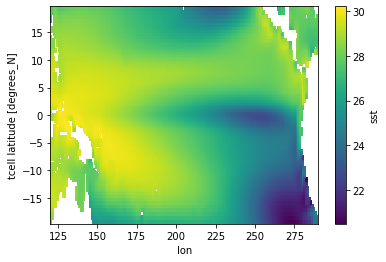

In [34]:
sst.sst.mean(dim=['time','ensemble']).plot()

In [8]:
nino12=sst.sel(lat=slice(-10,0),lon=slice(270,280))
nino3=sst.sel(lat=slice(-5,5),lon=slice(210,270))
nino34=sst.sel(lat=slice(-5,5),lon=slice(190,240))
ONI=sst.sel(lat=slice(-5,5),lon=slice(190,240))
nino4=sst.sel(lat=slice(-5,5),lon=slice(160,210))

In [9]:
nino34

<xarray.Dataset>
Dimensions:   (ensemble: 96, lat: 30, lon: 50, time: 456)
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
  * lon       (lon) float64 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
  * lat       (lat) float64 -4.833 -4.5 -4.166 -3.834 ... 3.834 4.166 4.5 4.833
Data variables:
    sst       (time, ensemble, lat, lon) float32 ...

In [24]:
mean_soi=soi.sst.mean(dim='ensemble')
mean_soi.plot()

In [25]:
mean_soi

<xarray.DataArray 'sst' (time: 456)>
array([ 0.62210757,  0.22342159, -0.21073008, -0.7410522 , -1.199768  ,
       -1.0634934 , -0.39693865,  0.39661184,  0.6222169 ,  0.4863064 ,
       -0.35967723, -1.1683011 , -1.5343585 , -1.6911839 , -1.8122492 ,
       -2.0479665 , -2.1789973 , -1.3056883 ,  0.08023413,  1.0831658 ,
        1.4081478 ,  1.8433107 ,  2.1624346 ,  2.2227032 ,  1.8456007 ,
        1.5910012 ,  1.5812359 ,  0.7737132 ,  0.28565773,  0.5967631 ,
        1.3713284 ,  1.8061833 ,  2.0129    ,  2.1326735 ,  2.1499476 ,
        1.8853253 ,  1.6554679 ,  1.2290015 ,  0.81293947,  0.30987594,
       -0.13647918,  0.10803207,  0.7430846 ,  1.4248066 ,  1.720983  ,
        1.9907268 ,  1.6934475 ,  1.319574  ,  0.96785873,  0.6675828 ,
        0.19723494, -0.29600278, -0.69180804, -0.50259876,  0.18931036,
        0.9834604 ,  1.3058296 ,  1.3514671 ,  0.56115323, -0.1082743 ,
       -0.2821568 , -0.58719176, -0.94382745, -1.5992523 , -1.9009339 ,
       -1.3031347 , -0.05683249,  0.9272453 ,  1.2441636 ,  1.2458297 ,
        0.6038918 ,  0.24574785,  0.30666536,  0.04673678, -0.17573285,
       -0.58899325, -0.53137547,  0.8119042 ,  2.0488017 ,  2.3493495 ,
        2.5411625 ,  2.8497088 ,  3.0062673 ,  2.8893805 ,  2.4558957 ,
        2.0148757 ,  1.4898643 ,  0.72178507,  0.03913228,  0.12173959,
        0.70039886,  1.3381191 ,  1.6211373 ,  1.9190087 ,  1.5240923 ,
        0.9923689 ,  0.74529433,  0.3814652 , -0.18934852, -0.7214722 ,
...
        1.0937182 ,  0.6905497 , -0.09609375, -0.6305552 , -1.143723  ,
       -0.85982376,  0.00426036,  0.54553026,  0.59922296,  0.95246965,
        0.14226037, -0.25468144, -0.20895375,  0.03040765, -0.20646061,
       -0.8536704 , -1.1663022 , -0.5372891 ,  0.62294465,  1.4060253 ,
        1.4595276 ,  1.8744141 ,  0.86476946, -0.00796976, -0.02661105,
       -0.052694  , -0.52865225, -1.332982  , -1.8485922 , -1.4666634 ,
       -0.27399412,  0.8710441 ,  0.63580436,  0.8274662 , -0.05540514,
       -0.60746557, -0.5998523 , -0.71085495, -1.0273075 , -1.629817  ,
       -2.083193  , -1.8249793 , -0.92821425, -0.8191231 , -1.1128536 ,
       -0.64990526, -2.1019433 , -2.5244033 , -2.441174  , -2.3051045 ,
       -1.8583097 , -1.836534  , -1.1213863 ,  0.51477146,  2.4705946 ,
        1.9844252 ,  1.769811  ,  2.5096571 ,  1.5924088 ,  1.0086635 ,
        0.6722316 ,  0.27008516, -0.14957444, -1.0537176 , -1.4647857 ,
       -1.1594712 ,  0.06363293,  0.7206964 ,  1.498128  ,  2.0974622 ,
        1.0946236 ,  0.7697633 ,  0.6882498 ,  0.49786654,  0.2428006 ,
       -0.45246753, -0.9444876 , -0.6952185 ,  0.34838605,  0.67529565,
        0.62151796,  0.9579093 , -0.7082958 , -1.3271092 , -1.1723305 ,
       -0.8663505 , -1.1206127 , -1.7675725 , -1.7754799 , -1.0911378 ,
        0.42745814,  1.1560216 ,  1.2965689 ,  1.4802417 , -0.16898377,
       -0.7780369 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01

(a) Compute area averaged total SST from Niño 1+2 region;

(b) Compute area averaged total SST from Niño 4 region;

(c) Compute monthly climatologies (e.g., 1950-1979) for area averaged total SST from Niño 1+2 region, and Niño 4 region, and subtract climatologies from area averaged total SST time series to obtain anomalies;

(d) Normalize each time series of anomalies by their respective standard deviations over the climatological period;

(e) Define the raw TNI as Niño 1+2 normalized anomalies minus Niño 4 normalized anomalies;

(f) Smooth the raw TNI with a 5-month running mean;

(g) Normalize the smoothed TNI by its standard deviation over the climatological period.

In [155]:
a=nino12.mean(dim=['lat','lon']).sst
b=nino4.mean(dim=['lat','lon']).sst

c_a_clim=a.groupby("time.month").mean("time")
c_a=a.groupby('time.month')
c_a1=c_a_clim-c_a

c_b_clim=b.groupby("time.month").mean("time")
c_b=b.groupby('time.month')
c_b1=c_b_clim-c_b

d_a=(c_a1/c_a1.std(dim='time'))
d_b=(c_b1/c_b1.std(dim='time'))

TNI_raw=d_a-d_b
TNI_smooth=TNI_raw.rolling(time=5).mean()

e=(TNI_smooth/TNI_smooth.std(dim='time'))


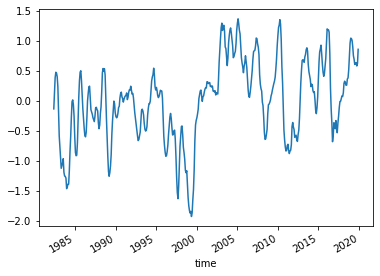

In [158]:
TNI_smooth.mean(dim='ensemble').plot()

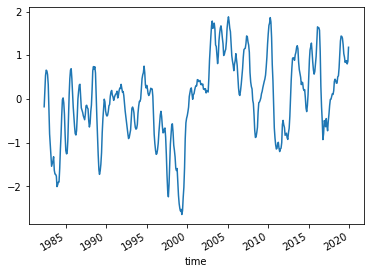

In [159]:
e.mean(dim='ensemble').plot()

In [160]:
TNI_smooth.std(dim='time')

<xarray.DataArray (ensemble: 96)>
array([0.7040276 , 0.777532  , 0.7497938 , 0.73093534, 0.68133664,
       0.7783573 , 0.7244874 , 0.71669704, 0.72849554, 0.7686984 ,
       0.7311418 , 0.79129213, 0.7825205 , 0.7007116 , 0.7578548 ,
       0.6876067 , 0.81898135, 0.7062547 , 0.81307924, 0.7795128 ,
       0.69588625, 0.6948371 , 0.7363542 , 0.723362  , 0.7410061 ,
       0.7662189 , 0.7482813 , 0.71369493, 0.7383065 , 0.7050528 ,
       0.76478213, 0.7353981 , 0.7378749 , 0.70917636, 0.70519274,
       0.71307105, 0.73893195, 0.74424505, 0.6312121 , 0.75707227,
       0.70330566, 0.7775946 , 0.615894  , 0.73150796, 0.720055  ,
       0.7137196 , 0.7683725 , 0.6431345 , 0.71344376, 0.75630146,
       0.6739217 , 0.7586051 , 0.67244047, 0.682855  , 0.70356905,
       0.72046447, 0.7287657 , 0.70686686, 0.7101105 , 0.6831562 ,
       0.75402796, 0.71932423, 0.73275   , 0.78890485, 0.7657058 ,
       0.72340286, 0.71668124, 0.75461966, 0.6992779 , 0.7411062 ,
       0.741456  , 0.73275626, 0.6711143 , 0.75745535, 0.7438627 ,
       0.75923383, 0.78709966, 0.7430924 , 0.7525431 , 0.7134063 ,
       0.7060455 , 0.7633682 , 0.7300401 , 0.7879314 , 0.70086545,
       0.72607523, 0.7090252 , 0.7079365 , 0.73884887, 0.69452685,
       0.74657464, 0.687997  , 0.747425  , 0.7314451 , 0.6561405 ,
       0.75811744], dtype=float32)
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96

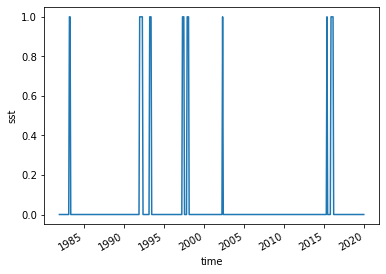

In [92]:
(soi.mean(dim='ensemble')<-2).dropna(dim='time').sst.plot()